In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")

## Next steps with our predictive model
Our predictive model with amenity count and price showed statistically relevant P values for each variable; however, our R squared was still too low. In an attempt to fix this, we will add a larger variety of variables to see if that increases the corrollation. 

Goals: 
- Merge the pickle from the previous notebook with additional variables we would like to check the significance of
- Use our linear regression model to see if this change made an impact
- Ideally reach a minimum R of 50%, because there are a number of other values that we do not have access to that could affect the price. Goal R squared would be above 70%.

In [3]:
df = pd.read_pickle("../../Datasets/Data_viz_project/airbnb_listings_predictive")

In [4]:
df_complete = pd.read_pickle("../../Datasets/Data_viz_project/airbnb_listings_price_normalized")

In [5]:
df.shape

(371013, 16)

In [6]:
df.columns

Index(['Listing ID', 'Price', 'Country', 'Amenity_Count', 'Country_Average',
       'Normalized', 'Const', 'Pred_1', 'AC2', 'Pred_2', 'AC3', 'Pred_3',
       'AC4', 'Pred_4', 'AC5', 'Pred_5'],
      dtype='object')

In [7]:
df_complete.shape

(380224, 34)

In [8]:
df_complete.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Country', 'latitude',
       'longitude', 'Property type', 'Room type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'Amenity_Count',
       'Country_Average', 'Normalized'],
      dtype='object')

In [9]:
df_m = df.merge(df_complete, on="Listing ID", how="left")[["Listing ID", 
                                                    "Host Response Rate",
                                                    "Host Is Superhost",
                                                    "Country_x",
                                                    "Accommodates",
                                                    "Bedrooms", 
                                                    "Bathrooms",
                                                    "Price_x",
                                                    "Minimum nights",
                                                    "Maximum nights",
                                                    "Review Scores Rating",
                                                    "Reviews per month", 
                                                    'Amenity_Count_x', 
                                                    'Country_Average_x',
                                                    'Normalized_x', 
                                                    'Const',
                                                    'Pred_1', 
                                                    'AC2', 
                                                    'Pred_2', 
                                                    'AC3', 
                                                    'Pred_3',
                                                    'AC4', 
                                                    'Pred_4', 
                                                    'AC5', 
                                                    'Pred_5'
                                                   ]]

In [10]:
df_m.columns

Index(['Listing ID', 'Host Response Rate', 'Host Is Superhost', 'Country_x',
       'Accommodates', 'Bedrooms', 'Bathrooms', 'Price_x', 'Minimum nights',
       'Maximum nights', 'Review Scores Rating', 'Reviews per month',
       'Amenity_Count_x', 'Country_Average_x', 'Normalized_x', 'Const',
       'Pred_1', 'AC2', 'Pred_2', 'AC3', 'Pred_3', 'AC4', 'Pred_4', 'AC5',
       'Pred_5'],
      dtype='object')

In [11]:
df_m.shape

(371023, 25)

In [12]:
df_m = df_m.rename(columns={"Country_x":"Country",
                     "Price_x":"Price",
                    "Amenity_Count_x":"Amenity_Count",
                    "Country_Average_x":"Country_Average",
                    "Normalized_x":"Normalized"})

### Model 1: Accomodates

In [13]:
X = df_m[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Accommodates", "Const"]]
y = df_m["Normalized"]

model = sm.OLS(y, X).fit()
result = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                 3.376e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:28:53   Log-Likelihood:            -3.5125e+05
No. Observations:              371023   AIC:                         7.025e+05
Df Residuals:                  371016   BIC:                         7.026e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AC5            8.039e-08   6.36e-08      1.263      0.207   -4.44e-08    2.05e-07
AC4           -5.719e-06   5.08e-06     -1.125      0.261   -1.57e-05    4.25e-06
AC3               0.0001      0.000      0.819      0.413      -0.000       0.000
AC2              -0.0007      0.002     -0.320      0.749      -0.005       0.003
Amenity_Count     0.0023      0.013      0.174      0.862      -0.024       0.028
Accommodates      0.2246      0.001    431.427      0.000       0.224       0.226
Const             0.1765      0.031      5.704      0.000       0.116       0.237
==============================================================================
Omnibus:                   265042.005   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10454572.084
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      28.309   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Even with only adding accomodates (which indicates size), the R value has increased by over 30%. Next, we will add bathroom and bedroom counts to see if that helps as well.

### Model 2: Bedrooms and Bathrooms

In [14]:
df_m = df_m.loc[~df_m["Bedrooms"].isna()]

In [15]:
df_m = df_m.loc[~df_m["Bathrooms"].isna()]

In [16]:
X = df_m[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Accommodates", "Bedrooms", "Bathrooms", "Const"]]
y = df_m["Normalized"]

model = sm.OLS(y, X).fit()
result = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                 3.141e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:28:54   Log-Likelihood:            -3.3505e+05
No. Observations:              369856   AIC:                         6.701e+05
Df Residuals:                  369847   BIC:                         6.702e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AC5            1.052e-07   6.12e-08      1.718      0.086   -1.48e-08    2.25e-07
AC4           -7.995e-06   4.89e-06     -1.634      0.102   -1.76e-05     1.6e-06
AC3               0.0002      0.000      1.447      0.148    -7.5e-05       0.000
AC2              -0.0023      0.002     -1.151      0.250      -0.006       0.002
Amenity_Count     0.0157      0.013      1.225      0.220      -0.009       0.041
Accommodates      0.1296      0.001    171.621      0.000       0.128       0.131
Bedrooms          0.2111      0.002    115.961      0.000       0.208       0.215
Bathrooms         0.2062      0.002     92.447      0.000       0.202       0.211
Const            -0.0747      0.030     -2.497      0.013      -0.133      -0.016
==============================================================================
Omnibus:                   252610.844   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9927752.964
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      27.761   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### This addition increased the R value from 0.35 to 0.40. Athough not extremely significant, we will keep it. Next we will add reviews per month, to see if a higher review rate (which we will use to estimate occuption rate), will affect the R value. 

### Model 3: Reviews per Month (as an estimate of occupancy)

In [17]:
X = df_m[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Accommodates", "Bedrooms", "Bathrooms", "Reviews per month", "Const"]]
y = df_m["Normalized"]

model = sm.OLS(y, X).fit()
result = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 2.886e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:28:55   Log-Likelihood:            -3.3254e+05
No. Observations:              369856   AIC:                         6.651e+05
Df Residuals:                  369846   BIC:                         6.652e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
AC5                4.743e-08   6.08e-08      0.780      0.436   -7.18e-08    1.67e-07
AC4               -3.438e-06   4.86e-06     -0.707      0.479    -1.3e-05    6.09e-06
AC3                7.302e-05      0.000      0.502      0.615      -0.000       0.000
AC2                  -0.0002      0.002     -0.116      0.908      -0.004       0.004
Amenity_Count         0.0028      0.013      0.220      0.826      -0.022       0.028
Accommodates          0.1338      0.001    177.808      0.000       0.132       0.135
Bedrooms              0.1960      0.002    107.639      0.000       0.192       0.200
Bathrooms             0.1999      0.002     90.164      0.000       0.196       0.204
Reviews per month    -0.0413      0.001    -71.214      0.000      -0.042      -0.040
Const                 0.0039      0.030      0.131      0.895      -0.054       0.062
==============================================================================
Omnibus:                   252618.413   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10098381.007
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      27.986   Cond. No.                     1.39e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We decided that reviews per month did not affect the model in a large way. We will not include it. Instead, we will check to see if Super Host Status will have an impact in the price.  

### Model 4: Super Host Status

In [18]:
df_m["Host Is Superhost2"] = df_m["Host Is Superhost"].replace(to_replace=True, value=1)

In [19]:
X = df_m[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Accommodates", "Bedrooms", "Bathrooms", "Host Is Superhost2", "Const"]]
y = df_m["Normalized"]

model = sm.OLS(y, X).fit()
result = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                 2.792e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:28:56   Log-Likelihood:            -3.3505e+05
No. Observations:              369856   AIC:                         6.701e+05
Df Residuals:                  369846   BIC:                         6.702e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AC5                 1.045e-07   6.12e-08      1.706      0.088   -1.56e-08    2.25e-07
AC4                 -7.96e-06   4.89e-06     -1.627      0.104   -1.76e-05    1.63e-06
AC3                    0.0002      0.000      1.443      0.149   -7.56e-05       0.000
AC2                   -0.0023      0.002     -1.146      0.252      -0.006       0.002
Amenity_Count          0.0156      0.013      1.219      0.223      -0.009       0.041
Accommodates           0.1296      0.001    171.575      0.000       0.128       0.131
Bedrooms               0.2111      0.002    115.916      0.000       0.208       0.215
Bathrooms              0.2062      0.002     92.427      0.000       0.202       0.211
Host Is Superhost2    -0.0084      0.003     -2.976      0.003      -0.014      -0.003
Const                 -0.0739      0.030     -2.471      0.013      -0.132      -0.015
==============================================================================
Omnibus:                   252560.172   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9923017.625
Skew:                           2.788   Prob(JB):                         0.00
Kurtosis:                      27.755   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### This change had no affect on the R value. The last values we will test will be minimum and maximum nights.

### Model 5: Min/Max nights

In [20]:
X = df_m[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Accommodates", "Bedrooms", "Bathrooms", "Maximum nights", "Minimum nights","Const"]]
y = df_m["Normalized"]

model = sm.OLS(y, X).fit()
result = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                 2.513e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:28:57   Log-Likelihood:            -3.3505e+05
No. Observations:              369856   AIC:                         6.701e+05
Df Residuals:                  369845   BIC:                         6.702e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
AC5             1.056e-07   6.12e-08      1.724      0.085   -1.44e-08    2.26e-07
AC4            -8.022e-06   4.89e-06     -1.639      0.101   -1.76e-05    1.57e-06
AC3                0.0002      0.000      1.452      0.147   -7.43e-05       0.000
AC2               -0.0023      0.002     -1.154      0.248      -0.006       0.002
Amenity_Count      0.0157      0.013      1.228      0.220      -0.009       0.041
Accommodates       0.1296      0.001    171.635      0.000       0.128       0.131
Bedrooms           0.2111      0.002    115.944      0.000       0.208       0.215
Bathrooms          0.2062      0.002     92.443      0.000       0.202       0.211
Maximum nights -7.314e-11   4.48e-11     -1.633      0.102   -1.61e-10    1.46e-11
Minimum nights  3.121e-05   9.53e-06      3.275      0.001    1.25e-05    4.99e-05
Const             -0.0748      0.030     -2.500      0.012      -0.133      -0.016
==============================================================================
Omnibus:                   252589.682   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9923489.574
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      27.755   Cond. No.                     7.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### These values had no affect on the R score. We will choose Model 3 to be our best representative model, even though it can only explain 41.3% of the variance between amenity count and price.

visualization of model 3

In [21]:
X = df_m[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Accommodates", "Bedrooms", "Bathrooms", "Reviews per month", "Const"]]
y = df_m["Normalized"]

model = sm.OLS(y, X).fit()
result = model.predict(X)
df_m["Model_3"] = result


No handles with labels found to put in legend.


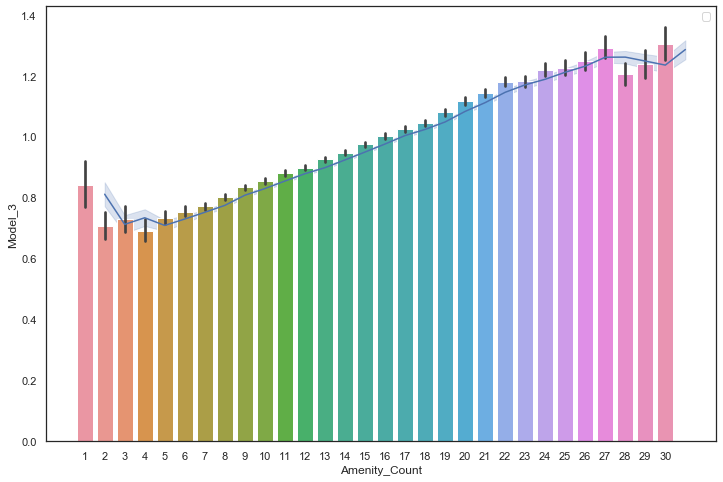

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_m,
                 x="Amenity_Count",
                 y="Normalized")
sns.lineplot(data=df_m,
            x="Amenity_Count", 
            y="Model_3");
plt.legend();


In [23]:
# df_m.to_pickle("../../Datasets/Data_viz_project/airbnb_listings_final_predictive")